##**1. Exploration Data Analys & Result:**
Ở phần này chúng ta tiến hành nghiên cứu dữ liệu các website và trực quan dữ liệu theo từng loại

Thư viện và các tập tin làm việc 

Khai báo thư viện và các tập tin chứa dữ liệu cần xử lý

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

Để có thể lấy dataset được lưu trữ, ta thông qua trang Github để lấy nó về.


In [ ]:
!git clone https://github.com/AnHoangbk19/Data_Saver.git
print(os.listdir())

fatal: destination path 'Data_Saver' already exists and is not an empty directory.
['.config', 'data_new.csv', 'Data_Saver', 'sample_data']


###1.1 Tổng quan về Dataset 
Việc lừa đảo qua mạng đang dần dần được phổ biến với những cách thức tinh vi khác nhau, với việc giả dạng cho giống một trang web thật để đánh lừa người dùng. Đây là một hình thức lừa đảo trong đó kẻ tấn công cố gắng tìm hiểu thông tin nhạy cảm như thông tin xác thực đăng nhập hoặc thông tin tài khoản bằng cách giả vờ là một tổ chức hoặc cá nhân có uy tín thông qua email hoặc các phương tiện liên lạc khác. \\
URL của các trang web lừa đảo có thể rất giống với các trang web thật đối với mắt người, nhưng chúng khác nhau về IP. \\
**URL basics**
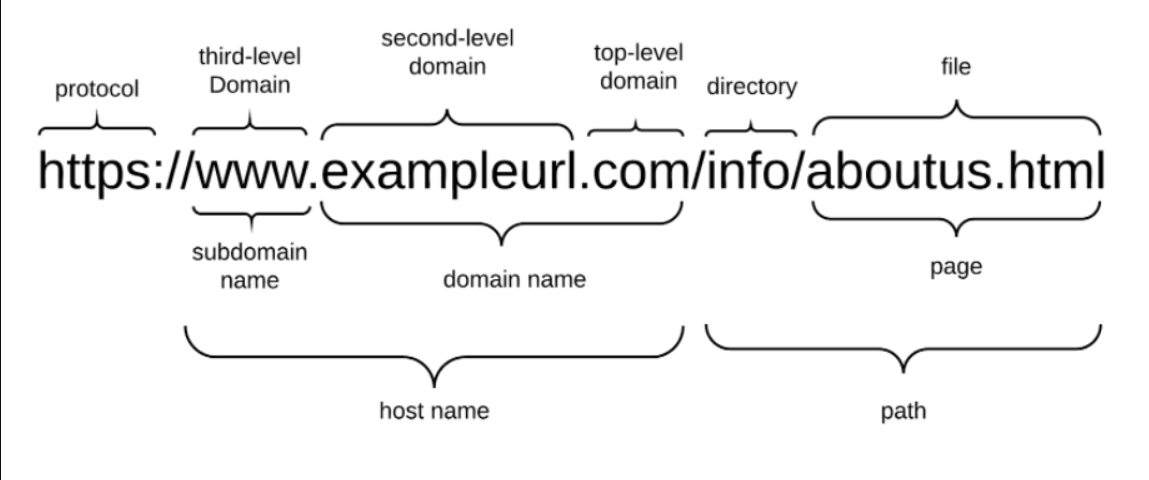 






*   **Domain name:**đây là phần bắt buộc vì nó phải được đăng ký với tên miền
*   **Subdomain name và Path:** hoàn toàn có thể bị những kẻ lừa đảo kiểm soát và đánh lừa người dùng





Tạo một data frame được đọc từ file dữ liệu đã khai báo

In [ ]:
data_all = pd.read_csv("Data_Saver/dataset_phishing.csv")
data_all.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
data_all.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


Qua dữ liệu trên ta thấy được, tập dữ liệu có 87 tính năng dưới dạng Numberic, được chia thành 3 lớp chính:


*   56 tính năng được trích từ cấu trúc và cú pháp của URL
*   24 tính năng được trích từ nội dung, thông tin từ trang Web
*   7 tính năng được truy xuất từ các dịch vụ bên ngoài 


Mục tiêu của dữ liệu này là xét **Status** để làm tập training cũng như làm tập test để xem độ chính xác của thuật toán:
*   **legitimate:** đường dẫn URL đến một trang Web hợp pháp
*   **phishing"** đường dẫn URL này đến một trang Web giả mạo

Lọc dữ liệu để lấy dữ liệu đường dẫn và tình trạng của website

In [ ]:
data = data_all.loc[:,['url','status']]
print(data.head())
print(data.shape)

                                                 url      status
0              http://www.crestonwood.com/router.php  legitimate
1  http://shadetreetechnology.com/V4/validation/a...    phishing
2  https://support-appleld.com.secureupdate.duila...    phishing
3                                 http://rgipt.ac.in  legitimate
4  http://www.iracing.com/tracks/gateway-motorspo...  legitimate
(11430, 2)


Chia dữ liệu vừa mới lọc thành hai data frame : dùng để train module và dùng để kiểm tra, cả hai dataframe bao gồm hai thành phần là URL và tình trạng của URL 

In [ ]:
data_train = data.loc[:10000,:]
data_test = data.loc[10001:,:]
print("Train shape:", data_train.shape)
print("Test shape:", data_test.shape)

Train shape: (10001, 2)
Test shape: (1429, 2)


In [ ]:
data_train.head()

,url,status
0,http://www.crestonwood.com/router.php,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,phishing
2,https://support-appleld.com.secureupdate.duila...,phishing
3,http://rgipt.ac.in,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate


###1.2 Data understanding


Từ dữ liệu tổng hợp : dựa vào tình trạng của website để lọc ra các website lừa đảo và website hợp pháp.

In [ ]:
data_legit = data_all.loc[data_all["status"]=="legitimate"]
data_phishing = data_all.loc[data_all["status"]=="phishing"]

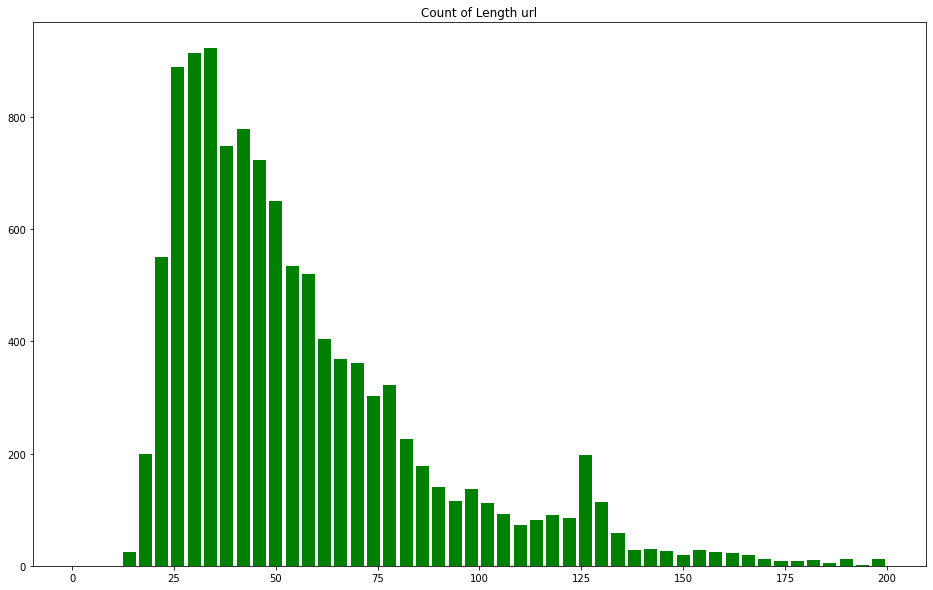

In [ ]:
plt.figure(figsize=(16, 10))
rangedomain = (0,200)
bins = 50
fig = plt.hist(data_all.loc[:,"length_url"], bins, rangedomain, color = 'green',
        histtype = 'bar', rwidth = 0.8)
plt.xlabel('',fontsize = 20)
plt.ylabel('',fontsize = 20)
plt.title('Count of Length url')
plt.show()

Text(0.5, 1.0, 'Count of Length phishing url')

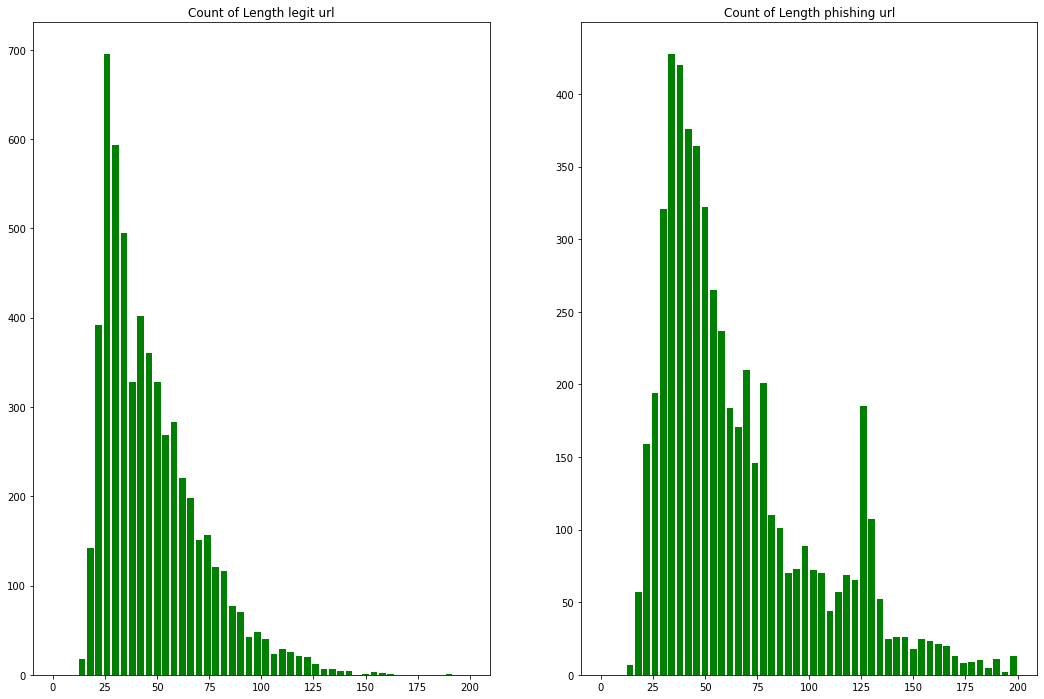

In [ ]:
plt.figure(figsize=(18, 12))
plt.subplot(121)
plot1 = plt.hist(data_legit.loc[:,"length_url"], bins, rangedomain, color = 'green',
        histtype = 'bar', rwidth = 0.8)
plt.title('Count of Length legit url')
plt.subplot(122)
plot2 = plt.hist(data_phishing.loc[:,"length_url"], bins, rangedomain, color = 'green',
        histtype = 'bar', rwidth = 0.8)
plt.title('Count of Length phishing url')

Ta so sánh tương quan về mặt đồ dài của URL website hợp pháp và lừa đảo. Nhận xét thấy rằng các website giả mạo thường có URL dài và nằm trong khoảng từ 75 ký tự trở lên. Trong khi URL có độ dài lớn hơn 80 của website hợp pháp rất ít và gần như không có ở đồ dài 150 ký tự trở lên.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


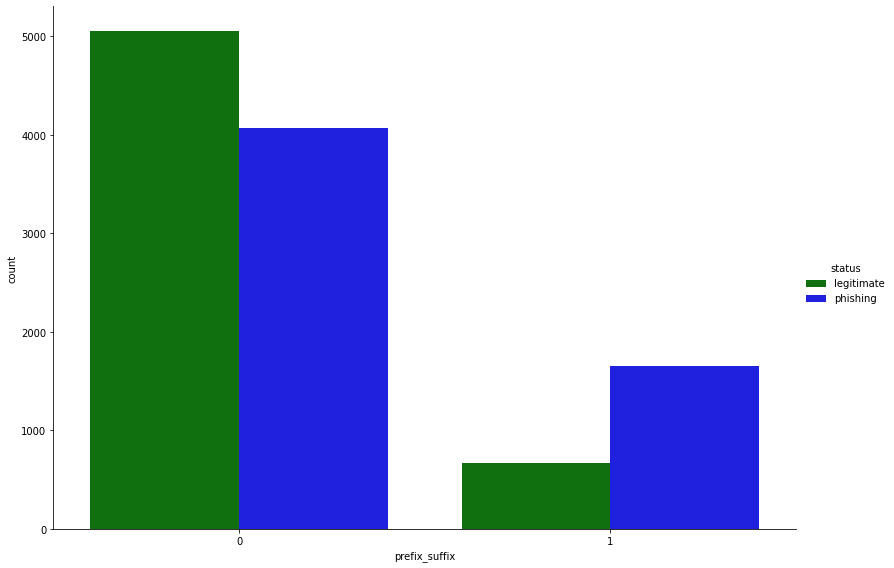

In [ ]:
sns.catplot("prefix_suffix", hue="status", data=data_all, kind="count", 
            palette={'legitimate':"green", 'phishing':"blue"} ,height=8.0, aspect=11.7/8.27 )

Tiền tố và hậu tố được phân các bởi ký tự '-' trong URL. Biểu đồ so sánh các website có tiền tố hay hậu tố trong URL. Nhận xét thấy các website lừa đảo có số lượng các URL có tiền tố hay hậu tố nhiều hơn.

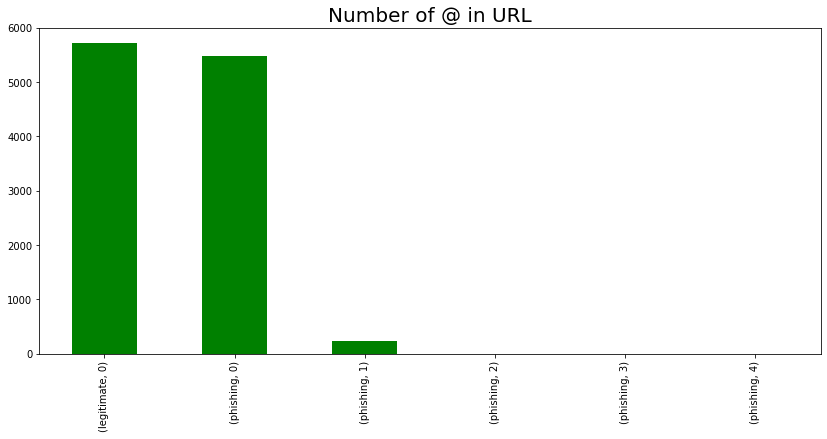

In [ ]:
data_at = data_all.groupby(['status'])['nb_at'].value_counts().sort_values(ascending=False)
data_at.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Number of @ in URL", fontsize = 20)
plt.show()

Biểu đồ số lượng "@" xuất hiện trong URL. Nhận xét thấy các website hợp pháp không có ký tự "@" trong URL. Do đó nếu website có ký tự "@" trong URL thì đó là website lừa đảo.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


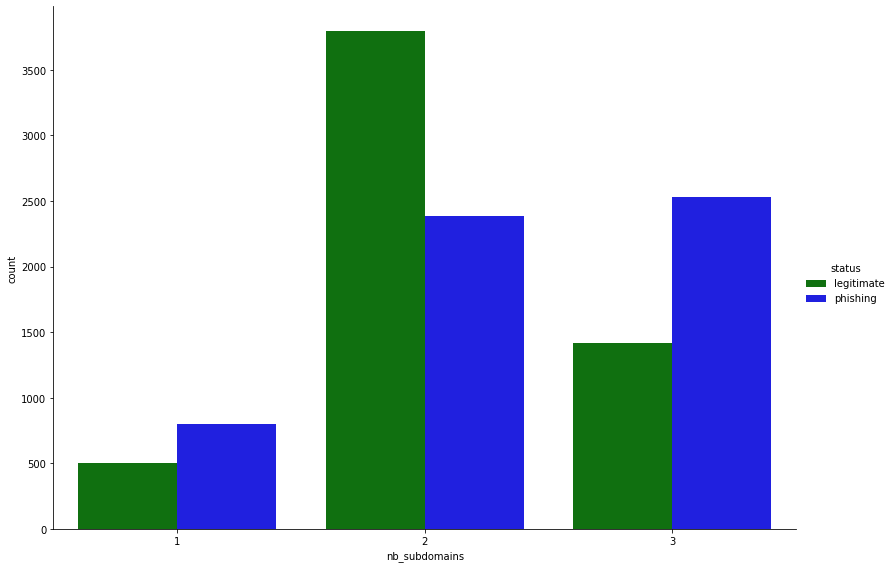

In [ ]:
sns.catplot("nb_subdomains", hue="status", data=data_all, kind="count", 
            palette={'legitimate':"green", 'phishing':"blue"} ,height=8.0, aspect=11.7/8.27 )

Biểu đồ số lượng miền phụ trong URL. Đối với website hợp pháp thì phần lớn sẽ có tối đa 2 miền phụ, còn website lừa đảo thì sẽ có từ 2 đến 3 miền phụ trong URL. Do đó URL có 3 miền phụ trở lên thì đó là website lừa đảo

Text(0.5, 1.0, 'Age of phishing domain')

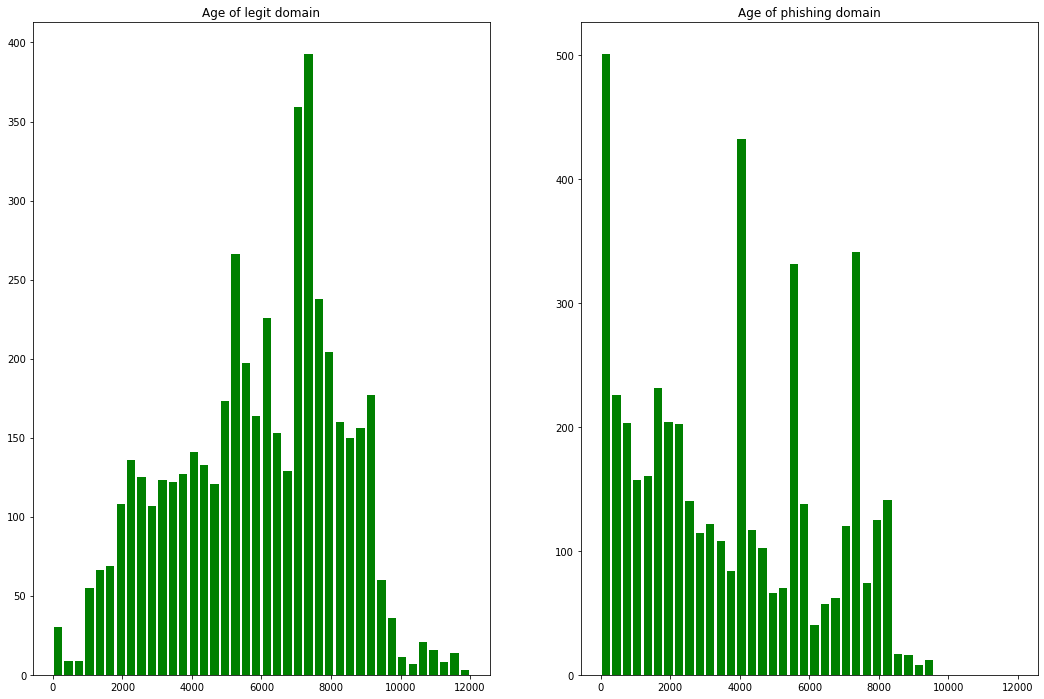

In [ ]:
plt.figure(figsize=(18, 12))
rangedomain = (0,12000)
bindomain = 40
plt.subplot(121)
plt.hist(data_legit.loc[:,"domain_age"], bindomain, rangedomain, color = 'green',
        histtype = 'bar', rwidth = 0.8)
plt.title('Age of legit domain')
plt.subplot(122)
plt.hist(data_phishing.loc[:,"domain_age"], bindomain, rangedomain, color = 'green',
        histtype = 'bar', rwidth = 0.8)
plt.title('Age of phishing domain')

Thời gian tên miền tồn tại của website hợp pháp phân bố chủ yếu ở giữa trong khoảng từ 2000h đến dưới 10000h. Đối với website lừa đảo thì tập trung ở đầu từ 0h đến 8000h và nhiều nhất quanh mốc 0. Từ đó có thể thấy tuổi của miền các website lừa đảo "trẻ" hơn so với website hợp pháp.

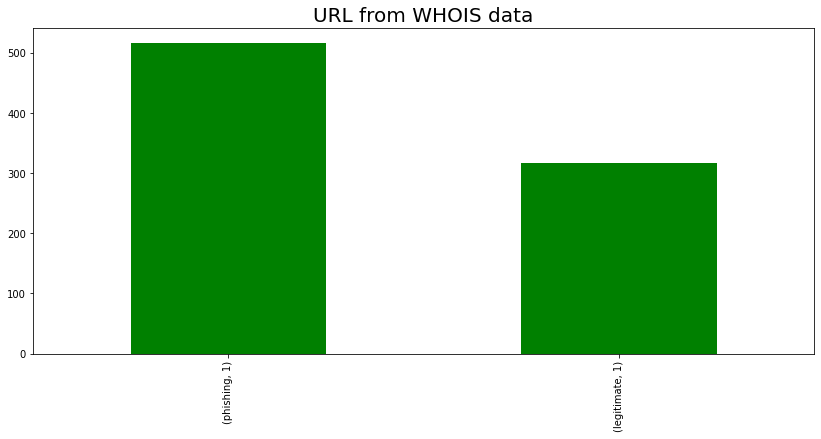

In [ ]:
data_registed_whois = data_all.groupby(['status'])['whois_registered_domain'].value_counts().sort_values(ascending=False)
data_registed_whois[2:].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("URL from WHOIS data", fontsize = 20)
plt.show()

Dễ dàng nhìn thấy, số lượng trang Web giả mạo mà không tìm được thông qua dữ liệu WHOIS nhiều gấp đôi so với trang web thông thường.

Text(0.5, 1.0, 'Page rank of phishing domain')

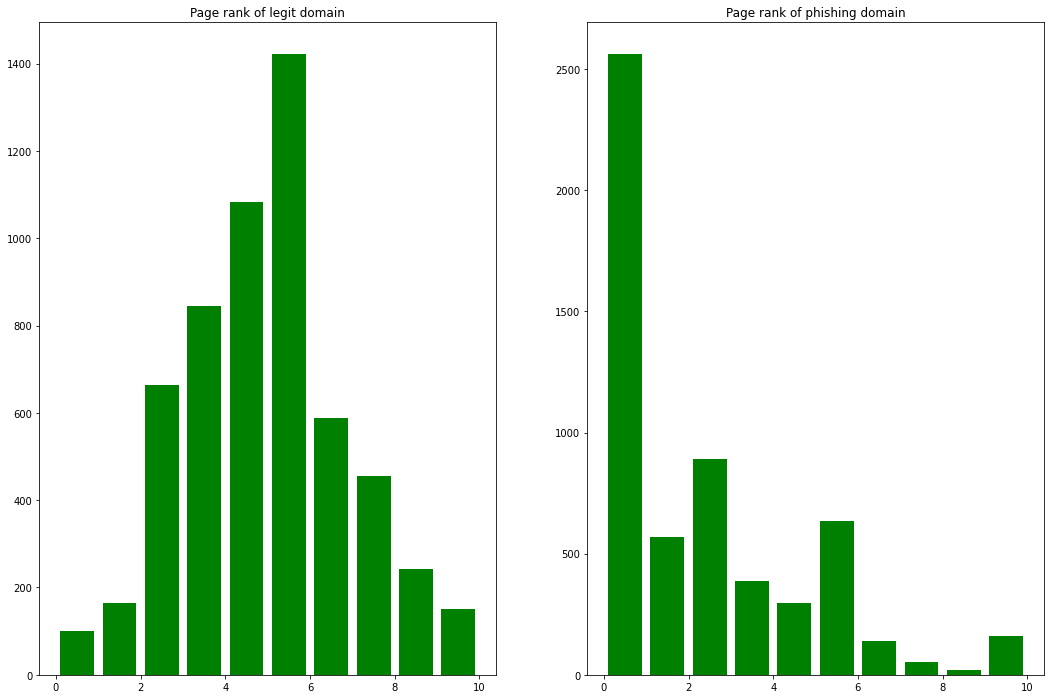

In [ ]:
plt.figure(figsize=(18, 12))
rangedomain = (0,10)
bindomain = 10
plt.subplot(121)
plt.hist(data_legit.loc[:,"page_rank"], bindomain, rangedomain, color = 'green',
        histtype = 'bar', rwidth = 0.8)
plt.title('Page rank of legit domain')
plt.subplot(122)
plt.hist(data_phishing.loc[:,"page_rank"], bindomain, rangedomain, color = 'green',
        histtype = 'bar', rwidth = 0.8)
plt.title('Page rank of phishing domain')

Độ tin tưởng của hai loại website trên thang điểm 10 dựa theo tiêu chuẩn của https://www.domcop.com/openpagerank/?fbclid=IwAR2rbVhz81hDiDbKJKSDvaW2S6ik6wlbkZKP1_3yinHjF3vjnI9Ndoz3e9g .
Dễ thấy rằng website hợp phát có độ tin tưởng cao hơn nhưng vẫn có một số website lừa đảo có độ tin tưởng tối đa, các trang Web giả mạo thường có điểm đánh giá khá thấp.

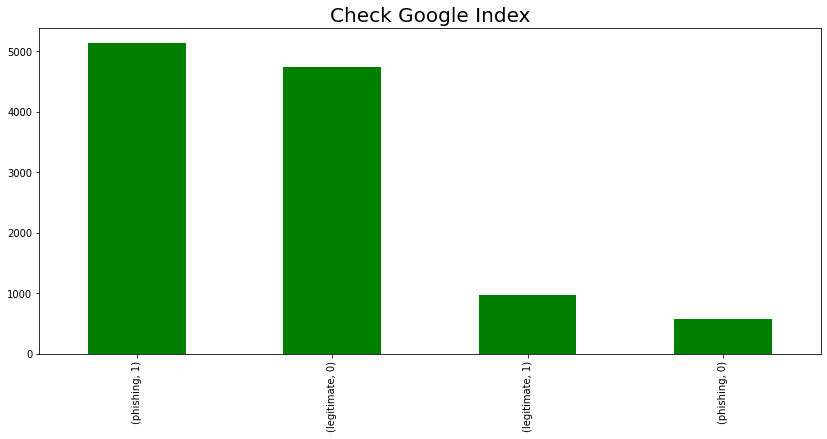

In [ ]:
data_ggindex = data_all.groupby(['status'])['google_index'].value_counts().sort_values(ascending=False)
data_ggindex.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Check Google Index", fontsize = 20)
plt.show()

Số lượng các website được tìm thấy trên google index. Các website lừa đảo đa số không có trên google index còn các website hợp pháp thì ngược lại phần lớn đều có trên google index

###1.3 Missing Value

Text(0.5, 1.0, 'Total Missing Value ')

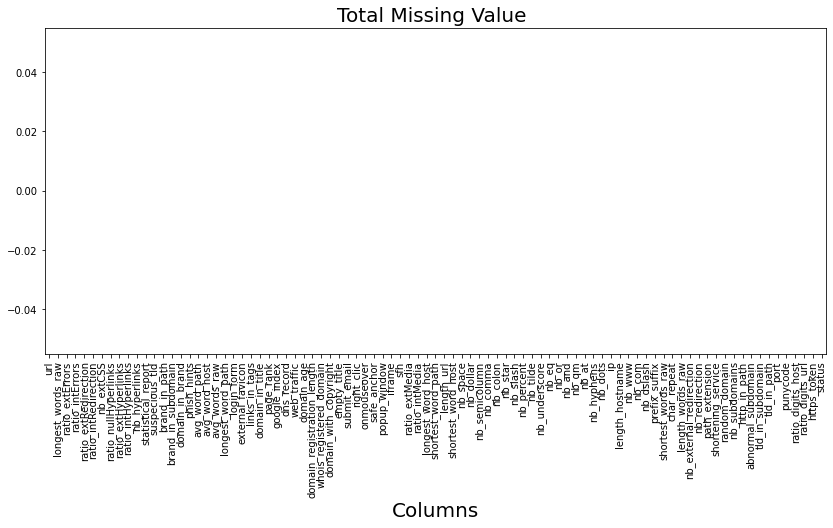

In [ ]:
percent = (data_all.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

Dễ dàng nhận thấy lượng data bị thiếu hay bị trống hầu như rất ít hoặc không có so với dataset.

##**2. Data Preprocessing**
Ở bước này, ta sẽ tìm kiếm các URL có các đặc tính (feature) như: có IPV4, IPV4 dạng hexadecimal, IPV6, độ dài của URL thuộc vùng an toàn, khả nghi hoặc nguy hiểm,...





In [ ]:
pip install tldextract

In [ ]:
pip install python-whois

In [ ]:
pip install certifi

In [ ]:
import sys
import re
import regex
from tldextract import extract
import ssl
import certifi
ssl._create_default_https_context = ssl._create_unverified_context
from datetime import date, datetime
from dateutil.parser import parse as date_parse
import whois
from urllib import request
import requests
from bs4 import BeautifulSoup
import socket
import xml.etree.ElementTree as ET

### IP
Kiểm tra url có chứa địa chỉ IP hay không
- Nếu có -> trả về 1
- Nếu không -> trả về -1

In [ ]:
def url_ip(url):
    match = re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
                    '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'  # IPv4 in hexadecimal
                    '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # IPv6
    if match:
        return 1
    return -1

### URL length
Tính độ dài của url
- Nếu độ dài < 54 -> trả về -1
- Nếu độ dài > 75 -> trả về 1
- Còn lại -> trả về 0

In [ ]:
def url_length(url):
    length = len(url)
    if length < 54:
        return -1
    elif length > 75:
        return 1
    return 0

### URL shorten
Kiểm tra url có bị rút ngắn hay không
- Nếu có -> trả về 1
- Nếu không -> trả về -1

In [ ]:
def url_shorten(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                    'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                    'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                    'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                    'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                    'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                    'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net', url)
    if match:
        return 1
    return -1

### @ in URL
Kiểm tra url có chứa ký tự @ hay không
- Nếu có -> trả về 1
- Nếu không -> trả về -1

In [ ]:
def url_symbol(url):
    if '@' in url:
        return 1
    return -1

### // in URL
Tìm vị trí của // trong url:
- Nếu xuất hiện vị trí > 7 -> trả về 1
- Còn lại -> trả về -1

In [ ]:
def url_double_slash(url):
    list = [x.start(0) for x in re.finditer('//', url)]
    if list[len(list) - 1] > 6:
        return 1
    return -1

### Prefix and Suffix
Kiểm tra tiền tố hoặc hậu tố có được phân tách bằng ký tự -
- Nếu có -> trả về 1
- Nếu không -> trả về -1


In [ ]:
def url_prefix_suffix(url):
    if re.findall(r"https?://[^\-]+-[^\-]+/", url):
        return 1
    return -1

### Subdomain
Kiểm tra tên miền
- Nếu có 1 dấu chấm -> trả về -1
- Nếu có 2 dấu chấm -> trả về 0
- Nếu có nhiều hơn 2 dấu chấm -> trả về 1

In [ ]:
def url_sub_domain(url):
    temp = len(re.findall("\.", url))
    if temp == 1:
        return -1
    elif temp == 2:
        return 0
    return 1

### Registration time
Kiểm tra thời gian đăng ký tên miền
- Nếu thời gian nhỏ hơn hoặc bằng 1 năm -> trả về -1
- Còn lại -> trả về 1

In [ ]:
def registration_time(domain):
    if isinstance(domain.creation_date, list):
        creation_date = domain.creation_date[0]
    else:
        creation_date = domain.creation_date

    creation_date = str(creation_date).split(' ')[0]

    if isinstance(domain.expiration_date, list):
        expiration_date = domain.expiration_date[0]
    else:
        expiration_date = domain.expiration_date

    expiration_date = str(expiration_date).split(' ')[0]
    creation_date = datetime.strptime(str(creation_date), '%Y-%m-%d')
    expiration_date = datetime.strptime(str(expiration_date), '%Y-%m-%d')
    time = abs((expiration_date - creation_date).days)
    year = time/365
    if year <= 1:
        return -1
    return 1

### Favicon
Kiểm tra favicon có được tải từ một miền khác hay không
- Nếu có -> trả về 1
- Nếu không -> trả về -1

In [ ]:
def favicon(soup, domain):
    if isinstance(domain.domain_name, list):
        domain = domain.domain_name[0].lower()
    else:
        domain = domain.domain_name.lower()

    for head in soup.find_all('head'):
        for head.link in soup.find_all('link', href=True):
            dots = [x.start(0) for x in re.finditer('\.', head.link['href'])]
            if domain in head.link['href']:
                return -1
            else:
                return 1
    return -1

### HTTPS token in URL
Kiểm tra url có chứa token http hay https hay không
- Nếu có -> trả về 1
- Nếu không -> trả về -1

In [ ]:
def https_token(url):
    match = re.search('https://|http://', url)
    if match.start(0) == 0:
        url = url[match.end(0):]
    match = re.search('http|https', url)
    if match:
        return 1
    return -1

### Request URL
Tính số lượng yêu cầu từ trang web
- Nếu yêu cầu < 22% -> trả về -1
- Nếu yêu cầu > 61% -> trả về 1
- Còn lại -> trả về 0

In [ ]:
def request_url(soup, domain):
    i = 0
    success = 0

    if isinstance(domain.domain_name, list):
        domain = domain.domain_name[0].lower()
    else:
        domain = domain.domain_name.lower()

    for img in soup.find_all('img', src=True):
        dots = [x.start(0) for x in re.finditer('\.', img['src'])]
        if domain not in img['src']:
            success = success + 1
        i = i + 1

    for audio in soup.find_all('audio', src=True):
        dots = [x.start(0) for x in re.finditer('\.', audio['src'])]
        if domain not in audio['src']:
            success = success + 1
        i = i + 1

    for embed in soup.find_all('embed', src=True):
        dots = [x.start(0) for x in re.finditer('\.', embed['src'])]
        if domain not in embed['src']:
            success = success + 1
        i = i + 1

    for i_frame in soup.find_all('i_frame', src=True):
        dots = [x.start(0) for x in re.finditer('\.', i_frame['src'])]
        if domain not in i_frame['src']:
            success = success + 1
        i = i + 1

    try:
        percentage = success / float(i)
        return round(percentage, 2)
    except:
        return 0

def evaluate_request(soup, domain):
    percentage = request_url(soup, domain)
    if percentage < 0.22:
        return -1
    elif percentage > 0.61:
        return 1
    return 0

### SFH
Kiểm tra Server Form Handler (SFH)
- Nếu SFH chứa chuỗi rỗng hoặc chuỗi "about:blank" -> trả về 1
- Nếu SFH chứa tên miền khác -> trả về 0
- Còn lại -> trả về -1

In [ ]:
def sfh(soup, domain):
    if isinstance(domain.domain_name, list):
        domain = domain.domain_name[0].lower()
    else:
        domain = domain.domain_name.lower()

    for form in soup.find_all('form', action = True):
        if form['action'] =="" or form['action'] == "about:blank" :
            return 1
        elif domain not in form['action']:
            return 0
        else:
            return -1
    return -1

### Email
Kiểm tra web có chuyển hướng đến email hay không
- Nếu có "mail()" hoặc "mailto" -> trả về 1
- Nếu không -> trả về -1

In [ ]:
def submit_to_email(soup):
   for form in soup.find_all('form', action= True):
      if ("mail()" or "mailto:") in form['action']:
          return 1
      else:
          return -1
   return -1

### Abnormal URL
Kiểm tra tên miền có trong url hay không
- Nếu có -> trả về -1
- Nếu không -> trả về 1

In [ ]:
def abnormal_url(domain, url):
    if isinstance(domain.domain_name, list):
        for domains in domain.domain_name:
            if domains.lower() in url:
                return -1
        return 1
    else:
        if domain.domain_name.lower() in url:
            return -1
        else:
            return 1

### Redirect
Tính số lần chuyển trang của web
- Nếu số lần <= 1 -> trả về -1
- Nếu số lần >= 4 -> trả về 1
- Còn lại -> trả về 0

In [ ]:
def redirect(url):
    count = 0
    while True:
        r = requests.head(url)
        if 300 < r.status_code < 400:
            url = r.headers['location']
            count += 1
        else:
            return count
            
def is_redirected(url):
    count = redirect(url)
    if count <= 1:
        return -1
    elif count >= 4:
        return 1
    return 0

### Status bar
Kiểm tra thanh trạng thái
- Có onMouseOver thay đổi thanh trạng thái -> trả về 1
- Không có -> trả về -1

In [ ]:
def status_bar(html):
    if re.findall("<script>.+onmouseover.+</script>", html):
        return 1
    return -1

### Right mouse
Kiểm tra nhấp chuột phải có bị vô hiệu hóa hay không
- Nếu có -> trả về 1
- Nếu không -> trả về -1

In [ ]:
def right_mouse(html):
    if re.findall(r"event.button ?== ?2", html):
        return 1
    return -1

### Pop-up Window
Kiểm tra có pop-up cảnh báo hay không
- Nếu có -> trả về 1
- Nếu không -> trả về -1

In [ ]:
def pop_up(html):
    if re.findall(r"alert\(", html):
        return 1
    return -1

### IFrame
Kiểm tra thẻ iframe để hiển thị trang web bổ sung có được sử dụng hay không
- Nếu có -> trả về 1
- Nếu không -> trả về -1

In [ ]:
def iframe(soup):
    for iframe in soup.find_all('iframe', width=True, height=True, frameBorder=True):
        if iframe['width']=="0" and iframe['height']=="0" and iframe['frameBorder']=="0":
            return 1
        else:
            return -1
    return -1

### Age of domain
Tính tuổi của tên miền
- Nếu nhỏ hơn 6 tháng -> trả về -1
- Còn lại -> trả về 1

In [ ]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month
def age_of_domain(domain):
    # Requests all the information about the domain
    whois_response = requests.get("https://www.whois.com/whois/" + (domain.domain_name[0].lower() if isinstance(domain.domain_name, list) else domain.domain_name.lower()))
    try:
        registration_date = re.findall(r'Registration Date:</div><div class="df-value">([^<]+)</div>', whois_response.text)[0]
        if diff_month(date.today(), date_parse(registration_date)) < 6:
            return -1
        else:
            return 1
    except:
        return 1

### Web traffic
Đo lường độ nổi tiếng của trang web
- Nếu rank <= 100000 -> trả về 1
- Nếu rank > 100000 -> trả về 0
- Nếu không tồn tại -> trả về -1

In [ ]:
def web_traffic(url):
    try:
        with request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url) as response:
            html = response.read()
    except:
        return -1

    try:
        tree = ET.fromstring(html.decode())
        rank = (tree.findall('*/REACH'))[0].attrib['RANK']
    except:
        return -1
    if (int(rank) <= 100000):
        return 1
    return 0

### Page Rank
- Nếu 0 < global rank < 100000 -> trả về 1
- Còn lại -> trả về -1

In [ ]:
def page_rank(global_rank):
    if global_rank > 0 and global_rank < 100000:
        return 1
    return -1

### Google Index
- Nếu 0 < global rank < 100000 -> trả về 1
- Còn lại -> trả về -1


In [ ]:
def google_index(global_rank):
    if global_rank > 0 and global_rank < 100000:
        return 1
    return -1

### Links pointing to page
Tính số liên kết trỏ đến trang
- Nếu số liên kết trỏ đến trang = 0 -> trả về -1
- Nếu số liên kết trở đến trang > 2 -> trả về 1
- Còn lại -> trả về 0

In [ ]:
def point_to_page(html):
    number_of_links = len(re.findall(r"<a href=", html))
    if number_of_links == 0:
        return -1
    elif number_of_links > 2:
        return 1
    return 0

## Generate Data
Từ một url ban đầu trích xuất ra các đặc tính đã xét ở trên. \\
Ta sẽ bỏ qua url trong các trường hợp sau:
- Url không truy cập được hoặc thời gian truy cập quá 10 giây.
- Không lấy được các đặc trưng cần thiết từ url.

In [ ]:
# Generate data set by extracting the features from the URL
def generate_data(url):
    data = [0]*26

    # Convert the given URL into standard format
    if not re.match(r"^https?", url):
        url = "http://" + url

    try:
        response = requests.get(url, timeout=10)
    except:
        print("Error getting response !!!")
        exit()
    try: 
        soup = BeautifulSoup(response.content, 'html.parser')
      
        # Get html code
        html = response.text

        dns = 1
        try:
            domain = whois.whois(url)
        except:
            dns = -1

        # Extract global rank of the website
        rank_checker_response = requests.post("https://www.checkpagerank.net/index.php", {
            "name": domain.domain_name[0].lower() if isinstance(domain.domain_name, list) else domain.domain_name.lower()
        })
        try:
            global_rank = int(re.findall(r"Global Rank: ([0-9]+)", rank_checker_response.text)[0])
        except:
            global_rank = -1

        # Generate data
        data[0] = url
        data[1] = url_ip(url)
        data[2] = url_length(url)
        data[3] = url_shorten(url)
        data[4] = url_symbol(url)
        data[5] = url_double_slash(url)
        data[6] = url_prefix_suffix(url)
        data[7] = url_sub_domain(url)
        data[8] = registration_time(domain)
        data[9] = favicon(soup, domain)
        data[10] = https_token(url)
        data[11] = evaluate_request(soup, domain)
        data[12] = sfh(soup, domain)
        data[13] = submit_to_email(soup)
        data[14] = abnormal_url(domain, url)
        data[15] = is_redirected(url)
        data[16] = status_bar(html)
        data[17] = right_mouse(html)
        data[18] = pop_up(html)
        data[19] = iframe(soup)
        data[20] = age_of_domain(domain)
        data[21] = dns
        data[22] = web_traffic(url)
        data[23] = page_rank(global_rank)
        data[24] = google_index(global_rank)
        data[25] = point_to_page(html)

        return data
    except:
        print('Error getting features !!!')
        exit()

Sinh dữ liệu từ một tập các url và ghi vào file 'data_new.csv'

In [ ]:
import csv
def generate_dataset(url_set):
    l = []
    for url in url_set:
        data_new = generate_data(url)
        if data_new:
            l.append(data_new)
    print(len(l))

    header = ['url', 'url_ip', 'url_length', 'url_shorten', 'url_symbol', 'url_double_slash', 'url_prefix_suffix', 'url_sub_domain', 'registration_time', 'favicon', 'https_token', 'request', 'sfh', 'submit_to_email', 'abnormal_url', 'is_redirected', 'status_bar', 'right_mouse', 'pop_up', 'iframe', 'age_of_domain', 'dns', 'web_traffic', 'page_rank', 'google_index', 'point_to_page']
    with open('./data_new.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(header)
        writer.writerows(l)

In [ ]:
generate_dataset(data_test[:30]['url'])

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Error getting response !!!
Error getting features !!!
Error getting response !!!
Error getting features !!!
Error getting response !!!
Error getting features !!!
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error getting features !!!
Error getting response !!!
Error getting features !!!
Error trying to connect to socket: closing socket
Error getting features !!!
Error getting response !!!
Error getting features !!!
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error getting response !!!
Error getting features !!!
Error getting features !!!
Error trying to connect to socket: closing socket
21


In [ ]:
data_new = pd.read_csv("./data_new.csv")
data_new.head()


,url,url_ip,url_length,url_shorten,url_symbol,url_double_slash,url_prefix_suffix,url_sub_domain,registration_time,favicon,...,status_bar,right_mouse,pop_up,iframe,age_of_domain,dns,web_traffic,page_rank,google_index,point_to_page
0,http://www.rbelectricidad.cl/ihrfall8730782780...,-1,1,-1,1,-1,-1,1,1,-1,...,-1,-1,-1,-1,1,1,-1,-1,-1,-1
1,http://cdn.ttgtmedia.com/searchSecurityIN/down...,-1,1,-1,-1,-1,-1,1,1,-1,...,-1,-1,-1,-1,1,1,0,-1,-1,-1
2,http://www.the-alcoholism-guide.org/reasons-fo...,-1,0,-1,-1,-1,-1,1,1,1,...,-1,-1,-1,-1,1,1,0,-1,-1,1
3,http://rockysite.net/i_logins/,-1,-1,-1,-1,-1,-1,-1,1,1,...,-1,-1,-1,-1,1,1,0,-1,-1,0
4,http://www.shadetreetechnology.com/V4/validati...,-1,1,-1,-1,-1,-1,0,1,1,...,-1,-1,-1,-1,1,1,-1,-1,-1,-1


##3.Result
* Bằng việc sử dụng kỹ thuật filter để lấy các thông tin cần thiết từ dữ liệu tổng như length_url, prefix_suffix,... và biểu thị chúng trên biểu đồ cột thông qua công cụ plot trong của python, ta đã trực quan hóa các dữ liệu từng loại cụ thể của hai legit website và phishing website. 
* Từ các biểu đồ đã được trực quan trong mỗi trường hợp, ta đưa ra được các kết luận về đặc điểm của một phishing website. Từ đó tạo nên nguồn dữ liệu để train và test trong quá trình train model sau này. Nếu một website có nhiều yếu tố của một website lừa đảo thì ứng dụng sẽ thông báo đây là website lừa đảo.

* Việc loại bỏ các giá trị không cần thiết (các giá trị không giúp chúng ta phân biện phishing website) và số hóa dữ liệu sang số liệu mình sẽ dùng để train model giúp cho tập train và test của model trở nên gọn gàng và vừa đủ thông tin, tiếp kiệm thời gian trong việc xử lý dữ liệu vô giá trị.
* Vì hiện kết nối với các Server vẫn còn nhiều khó khăn nên việc lưu trữ dữ liệu làm sạch lên database đã được lưu trên Github: https://github.com/AnHoangbk19/Data_Saver.git 


##4.Limitations
Việc đánh giá sai về một trang web là hoàn toàn có thể xảy ra, khi mà mô hình luôn có một độ sai số nhất định. Việc đánh giá sai một trang web sẽ khiến người dùng có sự dè chừng và mất niềm tin vào trang web - việc này là việc cần tránh. 

Hơn nữa, mô hình còn phải đối mặt với các thách thức:



1.   **Chất lượng của dữ liệu đầu vào**
 
  Ngày càng có nhiều trang web được sinh ra, trong đó có cả những trang web lừa đảo, dữ liệu để train phải chất lượng và có số lượng tốt. Ngoài ra, dữ liệu phải được bảo mật, vì kẻ lừa đảoc có thể tìm được các đặc điểm (features) từ tập dữ liệu, từ đó tạo ra những trang web ngày càng tinh vi. 
2.   **Trích xuất và lựa chọn các đặc điểm (featrures) một cách hiệu quả**

  Các quy tắc mà mô hình chúng tôi đưa ra chưa thật sự tốt, do có nhiều URL được định nghĩa theo một quy tắc của bên thứ ba. Vì vậy đầu ra của mô hình có thể sẽ không ổn định và có sai sót đối với một số các trang web nhất định.

  Ngoài ra đó còn là việc overfitting, một hành vi mà khiến cho mô hình không hoạt động tốt.

3. **URL nhỏ (Tiny URL) - URL rút gọn**

  Vì các URL nhỏ không hiển thị tên miền thực, hướng tài nguyên hoặc các tham số tìm kiếm, các kỹ thuật lựa chọn tính năng dựa trên quy tắc có thể vô dụng đối với các URL nhỏ. Do các URL nhỏ được tạo bởi các dịch vụ khác nhau, rất khó để chuyển đổi chúng thành URL gốc. Hơn nữa, các URL nhỏ là các chuỗi ngắn không thân thiện với quá trình xử lý ngôn ngữ tự nhiên để trích xuất các tính năng cấp ký tự.

4. **Lưu trữ dữ liệu đã làm sạch xuống CSDL**

  Do hạn chế về mặt công nghệ kỹ thuật, mô hình của chúng tôi sau khi đã làm sạch dữ liệu vẫn chưa lưu xuống một CSDL nhất định. 

5. **Sự đa dạng của đồ thị**

  Do sự hạn chế về kiến thức trong kỹ thuật lập trình, các đồ thị được đưa ra chưa thật sự phong phú.

***BIỆN PHÁP KHẮC PHỤC HẠN CHẾ***

   

  * **Chất lượng dữ liệu đầu vào, các feature:**   Cần có bộ phận Data miner, đảm bảo dữ liệu đầu vào đạt chuẩn và bảo mật. Ngoài ra phải liên tục cập nhật dữ liệu do các kẻ lừa đảo ngày càng có những thủ thuật tinh vi.
  * **Lưu trữ dữ liệu đã làm sạch xuống CSDL, đa dạng hóa đồ thị: ** 
 